# Preprocessing and keyword extracting on WSJ Headlines since 2023/03/01 #

### `Danial Gharib : 400105155` ###
### `Natural Language Processing` , `Prof: Dr.Ehsan Asgari` ####

##### Prerequisites #####

In [139]:
# packages to be installed before running the notebook
# !pip install nltk
# !pip install spacy
# !pip install yake

### imports ###

In [38]:
import json
import numpy as np
import random
from datetime import datetime
import re
import nltk

### Some info about crawled data ###

The data has been gathered by crawling Wall Street Journal's website and it's archives since 2023/03/01 up to 2024/03/31. The data structure only contains the news headline and its type and release time but not all the news description and article itself. And has been stored in unprocessed folder in WSJ_headlines.json file. The code for crawling the data can be found in crawl.py

### Loading unprocessed data ###

In [2]:
with open('unprocessed/WSJ_headlines.json', 'r') as file:
    unprocessed_data = json.load(file)

In [9]:
# now extracting only headlines
unprocessed_headlines = []
for dict_of_the_day in unprocessed_data:
    today_headlines_dict = dict_of_the_day['headlines']
    for headlines_dict in today_headlines_dict:
        unprocessed_headlines.append(headlines_dict['headline title'])

now we randomly select some headlines and display them :

In [16]:
random_headlines = random.sample(unprocessed_headlines, 10)
for headline in random_headlines:
    print(headline)

The Paper-Thin Steel Needed to Power Electric Cars Is in Short Supply
‘Ashoka’ Review: Conquer First, Enlighten Later
Xi Jinping, EU Officials Seek to Ease Economic Tensions at Summit
‘August Wilson’ Review: Staging the Blues
First Republic Bank Shares Sink More Than 40% After Earnings Report
From Zero to Hero
Private Equity Firms Return—Tentatively—to Debt-Fueled Payouts
‘Making Her Mark’ and ‘Remix: The Collection’ Review: Centuries of Creative Women
Widespread Drought Creates Winners and Losers in U.S. Agriculture
U.K. Inflation Falls More than Expected


### Basic properties of the data ###

In this section we see some basic properties and facts about the data like the number of headlines, avg number of words per sentence, etc.

In [39]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daniyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
print(f"Number of headlines : {len(unprocessed_headlines)}")
start_date = datetime.strptime("2023/03/01", "%Y/%m/%d")
end_date = datetime.strptime("2024/03/31", "%Y/%m/%d")
num_days = (end_date - start_date).days
print(f"Number of days from 2023/03/01 to 2024/03/31 is : {num_days}")
print(f"Average news headlines per day : {len(unprocessed_headlines)/num_days}")
all_words = []
for headline in unprocessed_headlines:
    words = headline.split()
    all_words.extend(words)
print(f"Number of words : {len(all_words)}")
print(f"Number of unique words : {len(set(all_words))}")
print(f"Average word length is : {np.mean([len(word) for word in all_words])}")
total_characters = 0
total_sentences = 0
for headline in unprocessed_headlines:
    sentences = sent_tokenize(headline)
    total_sentences += len(sentences)
    for sentence in sentences:
        total_characters += len(sentence)

print(f"Number of sentences overall : {total_sentences}")
print(f"Average number of sentences per news headline : {total_sentences/len(unprocessed_headlines)}")   
print(f"Average sentence length in characters is : {total_characters/total_sentences}") 
print(f"Average headline length in characters is : {total_characters/len(unprocessed_headlines)}")
print(f"Longest word is : {max(all_words, key=len)}")
print(f"Longest headline is : {max(unprocessed_headlines, key=len)}")
print(f"Shortest headline is : {min(unprocessed_headlines, key=len)}")


Number of headlines : 30634
Number of days from 2023/03/01 to 2024/03/31 is : 396
Average news headlines per day : 77.35858585858585
Number of words : 270565
Number of unique words : 36023
Average word length is : 5.300811265315174
Number of sentences overall : 33277
Average number of sentences per news headline : 1.0862766860351243
Average sentence length in characters is : 50.231721609520086
Average headline length in characters is : 54.565548083828425
Longest word is : Townhouse-Turned-Montessori
Longest headline is : Supreme Court Concludes Session With Rulings on Affirmative Action, Student Debt and Where Gay Rights and Free Speech Intersect
Shortest headline is : Ann Lowe


For a quick review we can see we have an average of 77.35 news every day, and also another interesting fact is average sentence length is long which indicates using more expressive and phrasal words.

### Preprocessings ###

In this part we write different preprocess functions that we think may be a good choice for the type of data we have.Including lowercase conversion, stopword removals, punctuation removals. We also try stemming and lemmatization.
Generally speaking, because news headlines' words mostly start with capital letters, it's a good option to convert them all to lowercase, also removing stopwords and punctuation can help us for extracting the keywords.

In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daniyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
def tokenize_sents(text):
    return nltk.sent_tokenize(text)

def stopword_removal(tokenized_sents):
    sw = [word.lower() for word in stopwords.words('english')]
    return [[word for word in sentence if word.lower() not in sw] for sentence in tokenized_sents]

def lowercase_conversion(tokenized_sents):
    return [[word.lower() for word in sentence] for sentence in tokenized_sents]

def min_length_filtering(tokenized_sents, minL = 2):
    return [[word for word in sentence if len(word) > minL] for sentence in tokenized_sents]

def punctuation_removal(tokenized_sents, punc_set=''):
    return [[word for word in sentence if word not in (string.punctuation + punc_set)] for sentence in tokenized_sents]

def word_tokenize(sentence):
    return nltk.word_tokenize(sentence)

Now we test the functions for first 4 headlines :

In [119]:
first4_headlines = [tokenize_sents(headline) for headline in unprocessed_headlines[0:4]]
first4_headlines = [word_tokenize(sent[0]) for sent in first4_headlines]
print("First 4 headlines without any preprocess : ")
for idx, headline in enumerate(first4_headlines):
    print(f"{idx+1})\t{headline}")
print("_________________________________________")
print("First 4 headlines without stopwords")
first4_headlines_without_stopwords = stopword_removal(first4_headlines)
for idx, headline in enumerate(first4_headlines_without_stopwords):
        print(f"{idx+1})\t{headline}")
print("_________________________________________")
print("First 4 headlines in lowercase")
first4_headlines_lowercase = lowercase_conversion(first4_headlines)
for idx, headline in enumerate(first4_headlines_lowercase):
      print(f"{idx+1})\t{headline}")
print("_________________________________________")
print("First 4 headlines without punctuation")
first4_headlines_without_punctuation = punctuation_removal(first4_headlines, punc_set='’‘')
for idx, headline in enumerate(first4_headlines_without_punctuation):
      print(f"{idx+1})\t{headline}")
print("_________________________________________")
print("Frist 4 headlines with word_len filter = 2")
first4_headlines_min_word = min_length_filtering(first4_headlines, minL=2)
for idx, headline in enumerate(first4_headlines_min_word):
      print(f"{idx+1})\t{headline}")

First 4 headlines without any preprocess : 
1)	['Oceanfront', 'Ranch', 'Where', '‘', 'Lost', '’', 'and', '‘', 'Hawaii', 'Five-O', '’', 'Have', 'Filmed', 'Sells', 'for', '$', '36.5', 'Million']
2)	['Elon', 'Musk', 'Confirms', 'Mexico', 'Factory', 'Plan', 'in', 'Mapping', 'Out', 'Costly', 'Vision', 'for', 'Tesla']
3)	['McDonald', '’', 's', 'Directors', 'Beat', 'Sexual', 'Misconduct', 'Oversight', 'Lawsuit']
4)	['Biden', ',', 'House', 'Democrats', 'Plot', '2024', 'Campaign', 'Strategy', 'Focused', 'on', 'Legislative', 'Wins']
_________________________________________
First 4 headlines without stopwords
1)	['Oceanfront', 'Ranch', '‘', 'Lost', '’', '‘', 'Hawaii', 'Five-O', '’', 'Filmed', 'Sells', '$', '36.5', 'Million']
2)	['Elon', 'Musk', 'Confirms', 'Mexico', 'Factory', 'Plan', 'Mapping', 'Costly', 'Vision', 'Tesla']
3)	['McDonald', '’', 'Directors', 'Beat', 'Sexual', 'Misconduct', 'Oversight', 'Lawsuit']
4)	['Biden', ',', 'House', 'Democrats', 'Plot', '2024', 'Campaign', 'Strategy', 'Foc

Now we use all these preprocessings together to preprocess the whole headlines data and then store it in `preprocessed` folder


In [120]:
sent_tokenized_headlines = [tokenize_sents(headline) for headline in unprocessed_headlines]
word_tokenized_headlines = [word_tokenize(sent[0]) for sent in sent_tokenized_headlines]
word_tokenized_headlines_preprocessed = min_length_filtering(punctuation_removal
                                                             (lowercase_conversion(stopword_removal(word_tokenized_headlines))))


In [137]:
sentence_based_headlines_preprocessed = [' '.join(words) for words in word_tokenized_headlines_preprocessed]
with open('preprocessed/WSJ_headlines_primary_preprocess.json', 'w') as f:
    json.dump(sentence_based_headlines_preprocessed, f, indent=2)

### Extracting Keywords ###
In this part we extract the keywords from the preprocessed data by using two different ways. we have used once yake and the other time using nltk library

In [151]:
import yake

In [152]:
# extracting keywords using yake library
concatenated_headlines = ' '.join([''.join(sentence) for sentence in sentence_based_headlines_preprocessed])
keyword_extractor = yake.KeywordExtractor()
keywords = keyword_extractor.extract_keywords(concatenated_headlines)
for keyword in keywords:
    print(keyword)

('review', 0.00015215269101972106)
('china', 0.00017331219413752077)
('biden', 0.00017335090382027187)
('supreme court', 0.00019932880982276045)
('trump', 0.00020253273004283373)
('million', 0.0002702283460445138)
('ukraine', 0.0003291318435392862)
('billion', 0.0004212825655802113)
('court', 0.0004264487206350933)
('deal', 0.00043716086345647176)
('books read week', 0.00048185522008942287)
('bank', 0.0004888019301449431)
('war', 0.0004963306469857272)
('home', 0.0005165171607056401)
('big', 0.0005266393218915296)
('stocks', 0.0005353910117583532)
('russia', 0.0005430121131837906)
('america', 0.0005710020092671155)
('israel', 0.0005786236930125554)
('market', 0.0005798435583494741)


In [161]:
# extracting keywords using nltk
from nltk.probability import FreqDist
import itertools
mp_freqdist = FreqDist(itertools.chain(*word_tokenized_headlines_preprocessed))    
top_15 = mp_freqdist.most_common(20)
print("word \t freq \tprecentage")
for word in top_15:
    print(f"{word[0]}\t {word[1]} \t{100*word[1]/len(word_tokenized_headlines_preprocessed)}")           

word 	 freq 	precentage
new	 1390 	4.537442057844225
review	 1378 	4.498269896193771
u.s.	 1070 	3.492851080498792
china	 1037 	3.3851276359600444
biden	 982 	3.2055885617287982
trump	 855 	2.791016517594829
million	 645 	2.1055036887118885
ukraine	 589 	1.922700267676438
says	 531 	1.7333681530325782
billion	 479 	1.5636221192139452
u.s	 452 	1.4754847555004245
deal	 450 	1.4689560618920154
court	 422 	1.37755435137429
russia	 413 	1.3481752301364498
big	 413 	1.3481752301364498
war	 413 	1.3481752301364498
america	 413 	1.3481752301364498
israel	 406 	1.3253248025070183
home	 397 	1.295945681269178
world	 378 	1.233923091989293


As you see we used two different approaches. One time we concatenated all of the headlines as a single text and gave it as input to yake library and extracted the keywords and another time using probablistic features of nltk library we extracted 15 most repeated words.

Overall we can say both functioned well and the results are also close. They have several words in common. for example : america, russia, court, israel, review, etc.

### Checking the effect of lemmatization on the keyword extracting ###
In this part we first lemmatize the word_tokenized_preprocessed data we had and then re-perform the keyword extracting methods we used in the previous part and try to compare the results and see if this type of preprocessing has a positive impact.

In [165]:
# first we lemmatize the words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_headlines = []
for headline in word_tokenized_headlines_preprocessed:
    lemmatized_headline = [lemmatizer.lemmatize(word) for word in headline]
    lemmatized_headlines.append(lemmatized_headline)

sentence_based_headlines_preprocessed_lemmatized = [' '.join(words) for words in lemmatized_headlines]

with open('preprocessed/WSJ_headlines_preprocessed+lemmatized.json', 'w') as f:
    json.dump(sentence_based_headlines_preprocessed_lemmatized, f, indent=2)

In [166]:
# extracting keywords using yake library
concatenated_headlines_lemmatized = ' '.join([''.join(sentence) for sentence in sentence_based_headlines_preprocessed_lemmatized])
keyword_extractor = yake.KeywordExtractor()
keywords = keyword_extractor.extract_keywords(concatenated_headlines_lemmatized)
for keyword in keywords:
    print(keyword)

('review', 0.0001492732033452693)
('china', 0.00017465875968029294)
('biden', 0.00017468664699896746)
('supreme court', 0.0002034784036062985)
('trump', 0.00020369995741035656)
('million', 0.0002518011244042164)
('ukraine', 0.0003321063731301599)
('bank', 0.0003378665219372543)
('stock', 0.00035941021198157536)
('billion', 0.0003789502187927458)
('deal', 0.00038505551701880335)
('court', 0.0004097735641890557)
('year', 0.0004423408212799562)
('home', 0.00044802647046883237)
('war', 0.0004609969652245483)
('market', 0.0004742165925631549)
('book read week', 0.0004960815875867541)
('big', 0.0005300134290791338)
('russia', 0.0005476732305590448)
('company', 0.0005548524085354267)


the whole expressions together hasn't changed a lot but now the order of the words has changed. for instance words like china, trump, bank, stock have a better rank and some words are not in the list now. like israel

In [167]:
# extracting keywords using nltk
from nltk.probability import FreqDist
import itertools
mp_freqdist = FreqDist(itertools.chain(*lemmatized_headlines))    
top_15 = mp_freqdist.most_common(20)
print("word \t freq \tprecentage")
for word in top_15:
    print(f"{word[0]}\t {word[1]} \t{100*word[1]/len(lemmatized_headlines)}")           

word 	 freq 	precentage
review	 1411 	4.605993340732519
new	 1390 	4.537442057844225
u.s.	 1070 	3.492851080498792
china	 1037 	3.3851276359600444
biden	 982 	3.2055885617287982
trump	 857 	2.7975452112032384
million	 698 	2.2785140693347263
say	 675 	2.203434092838023
ukraine	 589 	1.922700267676438
bank	 545 	1.7790690082914409
billion	 537 	1.752954233857805
stock	 527 	1.7203107658157604
deal	 516 	1.684402950969511
year	 473 	1.5440360383887184
get	 464 	1.5146569171508781
home	 462 	1.5081282235424691
u.s	 452 	1.4754847555004245
war	 449 	1.4656917150878108
court	 444 	1.4493699810667886
market	 436 	1.4232552066331527


Again we see some changes in the order of the list and also some new words. We can see after lemmatization the word "year" has been added to both lists.(which weren't present the first time without lemmatization)

### Checking the impact of Stemming on the keyword extracting ###
It's like the previous time that we checked the impact of lemmatization on the keyword extracting but this time we check the impact of stemming.

In [169]:
# first we lemmatize the words
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_headlines = []
for headline in word_tokenized_headlines_preprocessed:
    stemmed_headline = [stemmer.stem(word) for word in headline]
    stemmed_headlines.append(stemmed_headline)

sentence_based_headlines_preprocessed_stemmed = [' '.join(words) for words in stemmed_headlines]

with open('preprocessed/WSJ_headlines_preprocessed+stemming.json', 'w') as f:
    json.dump(sentence_based_headlines_preprocessed_stemmed, f, indent=2)

In [170]:
# extracting keywords using yake library
concatenated_headlines_stemmed = ' '.join([''.join(sentence) for sentence in sentence_based_headlines_preprocessed_stemmed])
keyword_extractor = yake.KeywordExtractor()
keywords = keyword_extractor.extract_keywords(concatenated_headlines_stemmed)
for keyword in keywords:
    print(keyword)

('review', 0.0001626172076210421)
('biden', 0.00018668509187819423)
('china', 0.0001884732628628003)
('trump', 0.0002212799327411785)
('suprem court', 0.00025034172914849344)
('million', 0.00027487075949987594)
('bank', 0.0003191546058686829)
('ukrain', 0.00036505371550856483)
('stock', 0.00039424976984428375)
('billion', 0.00041062822050082643)
('deal', 0.0004168511095896556)
('court', 0.00045395996525414846)
('market', 0.0004686117350439172)
('year', 0.00048719819417262773)
('home', 0.0004912573000671582)
('war', 0.0005048441176663198)
('back', 0.0005455435447537779)
('make', 0.0005506929911690878)
('big', 0.000582690141004493)
('russia', 0.0005946515877779938)


In [171]:
# extracting keywords using nltk
from nltk.probability import FreqDist
import itertools
mp_freqdist = FreqDist(itertools.chain(*stemmed_headlines))    
top_20 = mp_freqdist.most_common(20)
print("word \t freq \tprecentage")
for word in top_20:
    print(f"{word[0]}\t {word[1]} \t{100*word[1]/len(stemmed_headlines)}")           

word 	 freq 	precentage
review	 1411 	4.605993340732519
new	 1390 	4.537442057844225
u.s.	 1070 	3.492851080498792
china	 1037 	3.3851276359600444
biden	 996 	3.2512894169876607
trump	 857 	2.7975452112032384
million	 698 	2.2785140693347263
say	 690 	2.2523992949010903
bank	 612 	1.997780244173141
get	 590 	1.9259646144806424
ukrain	 589 	1.922700267676438
billion	 537 	1.752954233857805
stock	 528 	1.7235751126199648
deal	 523 	1.7072533785989423
market	 474 	1.5473003851929228
year	 473 	1.5440360383887184
home	 462 	1.5081282235424691
u.	 452 	1.4754847555004245
make	 450 	1.4689560618920154
war	 450 	1.4689560618920154


The impact of stemming does not seem to be that improving, although the general result is the same and most of the words are again present but we see some words that are stems of verbs like "make" which really does not seem to be an important keyword here. So overall we can say stemming maybe is not the best choice for this type of data when we want to do keyword extraction

About the impact of lemmatization we cannot say for sure that it has improved or decreased the accuracy or quality of keyword extracting at least in the top 20 keywords that have been extracted. But if we want to compare the two libraries yake and nltk, it seems maybe yake library is a bit more powerful since it has extracted some keywords like "supreme court" which is a bigram.

### Sentiment Analysis for headlines since 2023/01/01 up to 2024/03/31 ###
In this part we calculate the average sentiment positivity/negitivity for each months by taking the average of the scores for each single headline in that month. We also use the unprocessed data because removing stopwords here may have a massive change(for example 'is' and 'isn't' are both removed but can have a massive difference in sentiment analysis). we also do not use any stemming or lemmatization with the same reason. And also removing punctuations and lowering the letters does not have much impact on the final score. So we ignore all this and calculate sentiment analysis score fore unprocessed headlines using nltk library.


In [172]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\daniyal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [206]:
from collections import defaultdict
from datetime import datetime

sia = SentimentIntensityAnalyzer()
monthly_sentiment_scores = defaultdict(list)

for entry in unprocessed_data:
    date = datetime.strptime(entry['date'], "%Y/%m/%d")
    month = date.strftime("%Y-%m")
    headlines = entry['headlines']
    for headline in headlines:
        title = headline['headline title']
        sentiment_score = sia.polarity_scores(title)
        monthly_sentiment_scores[month].append(sentiment_score['compound'])



In [209]:
# Calculate average sentiment scores for each month
average_monthly_sentiment_scores = {}
for month, score_list in monthly_sentiment_scores.items():
    num_headlines = len(score_list)
    avg_score = sum(score for score in score_list) / num_headlines
    average_monthly_sentiment_scores[month] = avg_score



In [210]:
for month, avg_scores in average_monthly_sentiment_scores.items():
    print(f"Month: {month}, Average Sentiment Scores: {avg_scores}")


Month: 2023-03, Average Sentiment Scores: -0.03392469941600822
Month: 2023-04, Average Sentiment Scores: -0.02268209486166009
Month: 2023-05, Average Sentiment Scores: -0.023120107238605848
Month: 2023-06, Average Sentiment Scores: -0.016291821862348198
Month: 2023-07, Average Sentiment Scores: -0.011575708678587005
Month: 2023-08, Average Sentiment Scores: -0.027001294363256847
Month: 2023-09, Average Sentiment Scores: -0.014126941855304028
Month: 2023-10, Average Sentiment Scores: -0.046837817638266076
Month: 2023-11, Average Sentiment Scores: -0.0025667260579064584
Month: 2023-12, Average Sentiment Scores: -0.01928740157480317
Month: 2024-01, Average Sentiment Scores: -0.02627663880334364
Month: 2024-02, Average Sentiment Scores: 0.006555248618784563
Month: 2024-03, Average Sentiment Scores: -0.018102807775377993


we can also visualize the results :

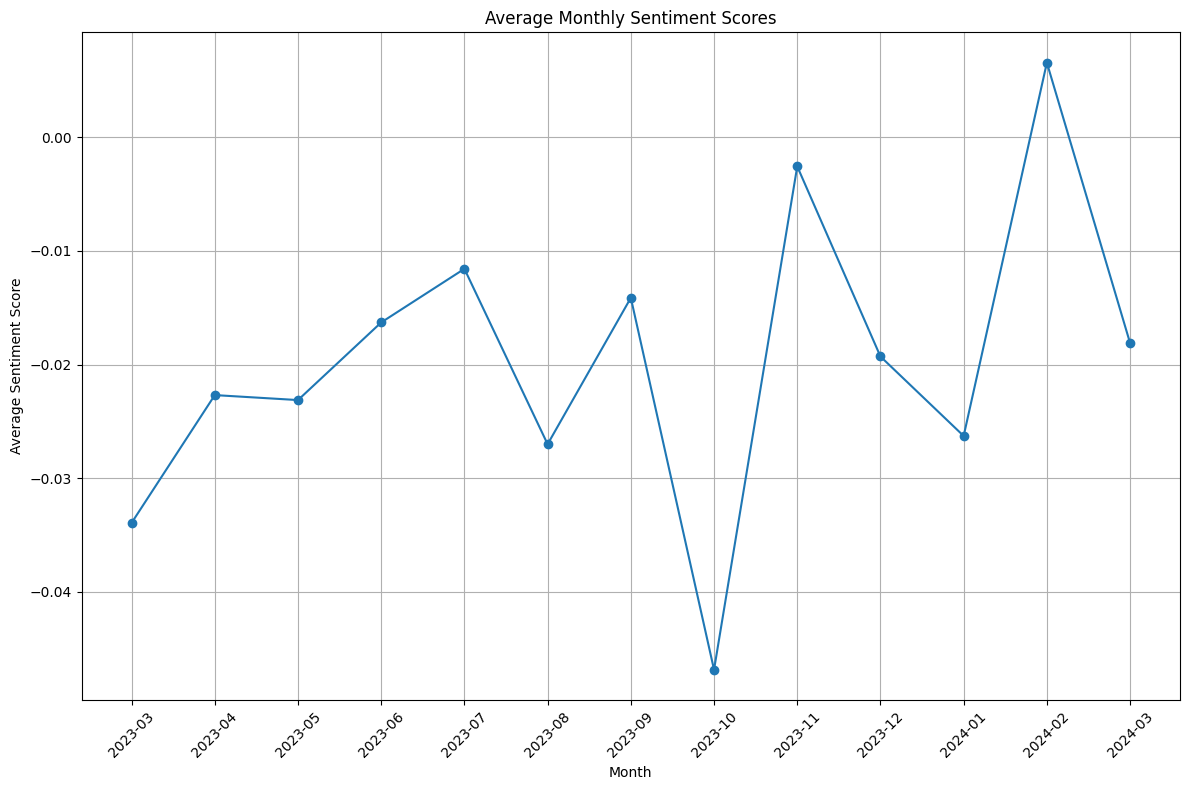

In [212]:
import matplotlib.pyplot as plt

months = list(average_monthly_sentiment_scores.keys())
scores = list(average_monthly_sentiment_scores.values())

plt.figure(figsize=(12, 8))
plt.plot(months, scores, marker='o', linestyle='-')
plt.title('Average Monthly Sentiment Scores')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Usually the news are neutral (with a tendency to being negative) except the second month of 2024 which is slightly positive.
A very interesting fact (which we could also predict) is that the lowest score for negativity of the news headlines for a month is the 10th month of 2023 which is the October-2023, the month that Israel-Hamas conflicts and war started and the world went into a shock! As we see we have a dramatic fall in the scores of the sentiment analysis of the news!